In [6]:
pip install opencv-python scikit-image


Note: you may need to restart the kernel to use updated packages.


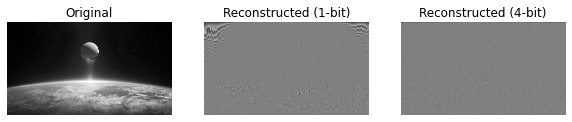

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse

def dpcm_encode(image, quantizer):
    """
    DPCM编码
    image: 待编码的灰度图像
    quantizer: 量化器
    """
    # 初始化差分编码矩阵和预测误差矩阵
    delta_coding = np.zeros(image.shape)
    prediction_error = np.zeros(image.shape)
    delta_coding[0, :] = image[0, :]  # 第一行直接赋值

    # 逐行逐像素进行编码
    for i in range(1, image.shape[0]):
        for j in range(0, image.shape[1]):
            # 使用前一个像素的预测值计算差分编码
            predicted_value = delta_coding[i-1, j] + quantizer
            delta_coding[i, j] = image[i, j] - predicted_value
            # 保存预测误差
            prediction_error[i, j] = predicted_value

    return delta_coding, prediction_error

def dpcm_decode(delta_coding, quantizer):
    """
    DPCM解码
    delta_coding: 差分编码矩阵
    quantizer: 量化器
    """
    # 初始化解码后的图像矩阵
    decoded_image = np.zeros(delta_coding.shape)
    decoded_image[0, :] = delta_coding[0, :]  # 第一行直接赋值

    # 逐行逐像素进行解码
    for i in range(1, delta_coding.shape[0]):
        for j in range(0, delta_coding.shape[1]):
            # 使用前一个像素的预测值计算解码后的像素值
            predicted_value = decoded_image[i-1, j] + quantizer
            decoded_image[i, j] = delta_coding[i, j] + predicted_value

    # 将解码后的图像矩阵转换为无符号整数类型，以便于显示
    decoded_image = np.uint8(decoded_image)

    return decoded_image

# 读入测试图像
image = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)

# 量化器设置和不同量化位数下的DPCM编码
quantizer_1bit = 128  # 量化器(1-bit)
quantizer_4bit = 16   # 量化器(4-bit)

delta_coding_1bit, _ = dpcm_encode(image, quantizer_1bit)
delta_coding_4bit, _ = dpcm_encode(image, quantizer_4bit)

# DPCM解码
reconstructed_image_1bit = dpcm_decode(delta_coding_1bit, quantizer_1bit)
reconstructed_image_4bit = dpcm_decode(delta_coding_4bit, quantizer_4bit)

# 显示原图和不同量化位数下的重建图像
fig, ax = plt.subplots(1, 3, figsize=(10,5))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(reconstructed_image_1bit, cmap='gray')
ax[1].set_title('Reconstructed (1-bit)')
ax[1].axis('off')

ax[2].imshow(reconstructed_image_4bit, cmap='gray')
ax[2].set_title('Reconstructed (4-bit)')
ax[2].axis('off')

plt.show()

# 计算重建图像的PSNR和SSIM
psnr_1bit = cv2.PSNR(image, reconstructed_image_1bit)
psnr_4bit = cv2.PSNR(image, reconstructed_image_4bit)

ssim_1bit = ssim(image, reconstructed_image_1bit, data_range=image.max() - image.min())
ssim_4bit = ssim(image, reconstructed_image_4bit, data_range=image.max() - image.min())


In [8]:
# 计算重建图像的PSNR和SSIM
psnr_1bit = cv2.PSNR(image, reconstructed_image_1bit)
psnr_4bit = cv2.PSNR(image, reconstructed_image_4bit)

ssim_1bit = ssim(image, reconstructed_image_1bit, data_range=image.max() - image.min())
ssim_4bit = ssim(image, reconstructed_image_4bit, data_range=image.max() - image.min())

print('PSNR (1-bit): ', psnr_1bit)
print('PSNR (4-bit): ', psnr_4bit)
print('SSIM (1-bit): ', ssim_1bit)
print('SSIM (4-bit): ', ssim_4bit)

PSNR (1-bit):  6.572272322181876
PSNR (4-bit):  6.568630589786455
SSIM (1-bit):  0.005383655376024323
SSIM (4-bit):  0.005519165730800034
